In [8]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Two-Genre Classification 
## Horror vs. Romance

In [9]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance/train'
validation_data_dir = 'horror_vs_romance/validation'
nb_train_samples = 800
nb_validation_samples = 200
epochs = 100
batch_size = 20
input_shape = (img_width, img_height, 3)

In [13]:
keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/100
40/40 [==============================] - 11s - loss: 0.9504 - acc: 0.6100 - val_loss: 0.8021 - val_acc: 0.5850
Epoch 2/100
40/40 [==============================] - 11s - loss: 0.6042 - acc: 0.7313 - val_loss: 0.5100 - val_acc: 0.7750
Epoch 3/100
40/40 [==============================] - 11s - loss: 0.5838 - acc: 0.7350 - val_loss: 0.5266 - val_acc: 0.7600
Epoch 4/100
40/40 [==============================] - 11s - loss: 0.5531 - acc: 0.7425 - val_loss: 0.5348 - val_acc: 0.7600
Epoch 5/100
40/40 [==============================] - 11s - loss: 0.5502 - acc: 0.7612 - val_loss: 0.5517 - val_acc: 0.7450
Epoch 6/100
40/40 [==============================] - 11s - loss: 0.5479 - acc: 0.7388 - val_loss: 0.4668 - val_acc: 0.8050
Epoch 7/100
40/40 [==============================] - 11s - loss: 0.5241 - acc: 0.7675 - val_loss: 0.4858 - val_acc: 0.7800
Epoch 8/100
40/40 [==============================] - 11s 

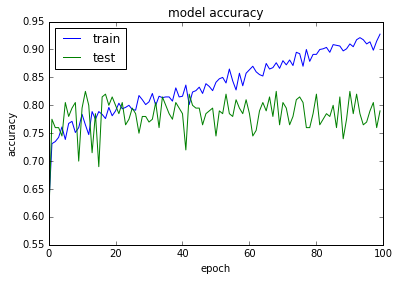

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

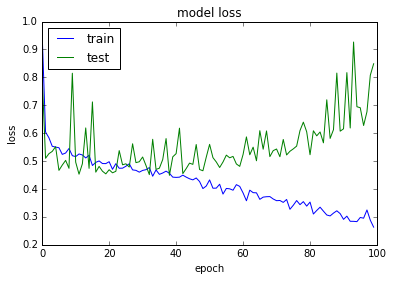

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Three-Genre Classification
## Horror vs. Romance vs. Scifi

In [33]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance_vs_scifi/train'
validation_data_dir = 'horror_vs_romance_vs_scifi/validation'
nb_train_samples = 1064
nb_validation_samples = 266
epochs = 100
batch_size = 20
input_shape = (img_width, img_height, 3)

In [34]:
keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 1064 images belonging to 3 classes.
Found 266 images belonging to 3 classes.
Epoch 1/100
53/53 [==============================] - 16s - loss: 1.3346 - acc: 0.4840 - val_loss: 0.9852 - val_acc: 0.5885
Epoch 2/100
53/53 [==============================] - 15s - loss: 1.0221 - acc: 0.5529 - val_loss: 0.9850 - val_acc: 0.5691
Epoch 3/100
53/53 [==============================] - 15s - loss: 1.0052 - acc: 0.5462 - val_loss: 0.9402 - val_acc: 0.5976
Epoch 4/100
53/53 [==============================] - 15s - loss: 0.9526 - acc: 0.5953 - val_loss: 1.0665 - val_acc: 0.4878
Epoch 5/100
53/53 [==============================] - 15s - loss: 0.9612 - acc: 0.5661 - val_loss: 0.8965 - val_acc: 0.6220
Epoch 6/100
53/53 [==============================] - 15s - loss: 0.9242 - acc: 0.6122 - val_loss: 0.9285 - val_acc: 0.6057
Epoch 7/100
53/53 [==============================] - 15s - loss: 0.9484 - acc: 0.5878 - val_loss: 0.9438 - val_acc: 0.5935
Epoch 8/100
53/53 [==============================] - 15s

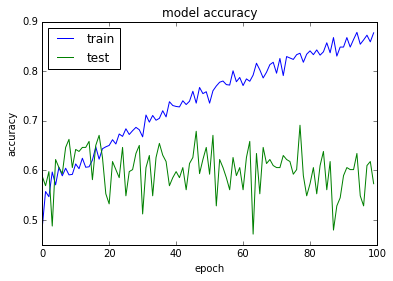

In [35]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

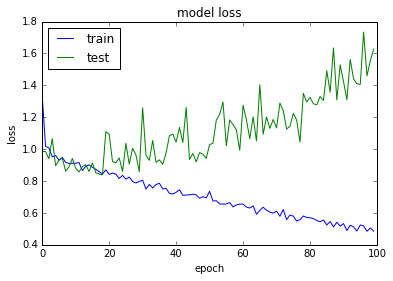

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')